In [108]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [109]:
df = pd.read_csv("data/coupons.csv")
df.replace(
    {"occupation": {"Education&Training&Library": "Education Training Library"}},
    inplace=True,
)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Axes: xlabel='Bar', ylabel='count'>

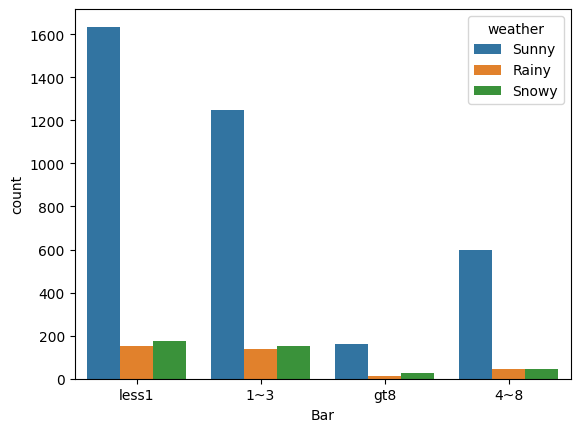

In [111]:
data = df[(df["Y"] == 1) & (df["Bar"] != "never")][["Bar", "weather"]]
sns.countplot(data, x="Bar", hue="weather")

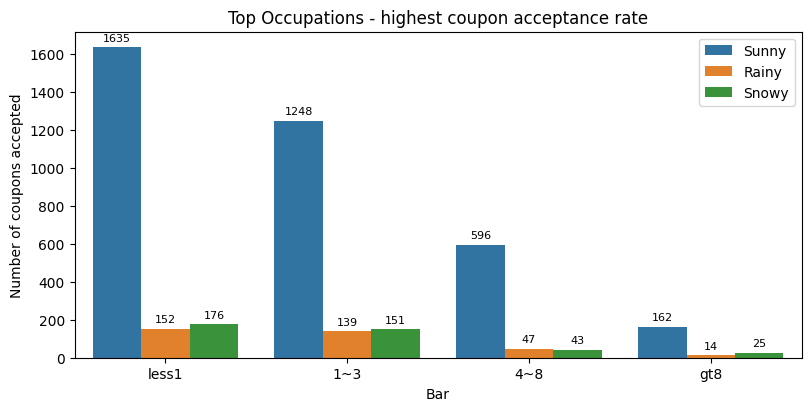

In [112]:
fig, ax = plt.subplots(layout="constrained", figsize=(8, 4))


rects = sns.countplot(
    data, x="Bar", hue="weather", order=["less1", "1~3", "4~8", "gt8"]
)
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)
ax.bar_label(rects.containers[2], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Top Occupations - highest coupon acceptance rate")
ax.legend(loc="upper right", ncols=1)
# ax.set_ylim(0, 2200)
plt.show()

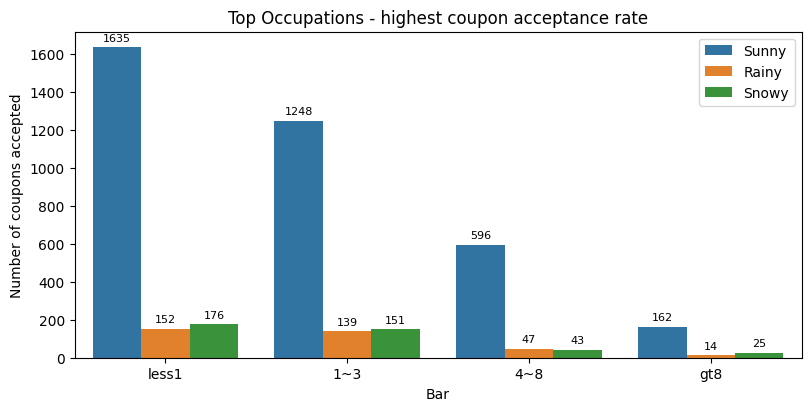

In [113]:
fig, ax = plt.subplots(layout="constrained", figsize=(8, 4))

rects = sns.countplot(
    data, x="Bar", hue="weather", order=["less1", "1~3", "4~8", "gt8"]
)
ax.bar_label(rects.containers[0], padding=3, fontsize=8)
ax.bar_label(rects.containers[1], padding=3, fontsize=8)
ax.bar_label(rects.containers[2], padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Top Occupations - highest coupon acceptance rate")
ax.legend(loc="upper right", ncols=1)
# ax.set_ylim(0, 2200)
plt.show()

In [178]:
def custom_func(group):
    # group["percentage"] = (group[("Y", "sum")] / group[("Y", "size")] * 100).round(2)
    group["percentage"] = (group["_sum"] / group["_size"] * 100).round(2)
    return group


overall = df.groupby("weather")

overall = (
    overall[["weather", "Y"]]
    .agg(
        _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
        _size=pd.NamedAgg(column="Y", aggfunc="size"),
    )
    .pipe(custom_func)
    .sort_values("percentage", ascending=False)
    .rename(columns={"percentage": "_percentage"})
)

coupons = [
    "Bar",
    "CoffeeHouse",
    "CarryAway",
    "RestaurantLessThan20",
    "Restaurant20To50",
]
heading = ["bar", "cafe", "togo", "r20", "r50"]

for ctr, coupon in enumerate(coupons):
    temp_df = (
        df[df[coupon] != "never"]
        .groupby("weather")[["weather", "Y"]]
        .agg(
            _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
            _size=pd.NamedAgg(column="Y", aggfunc="size"),
        )
        .pipe(custom_func)
        .rename(
            columns={
                "_sum": heading[ctr] + "_sum",
                "_size": heading[ctr] + "_size",
                "percentage": heading[ctr] + "_percent",
            }
        )
    )
    overall = pd.concat([overall, temp_df], axis=1)

In [179]:
overall

,_sum,_size,_percentage,bar_sum,bar_size,bar_percent,cafe_sum,cafe_size,cafe_percent,togo_sum,togo_size,togo_percent,r20_sum,r20_size,r20_percent,r50_sum,r50_size,r50_percent
weather,,,,,,,,,,,,,,,,,,
Sunny,5989,10069,59.48,3694,5931,62.28,4865,7700,63.18,5923,9956,59.49,5900,9916,59.50,5053,8290,60.95
Snowy,661,1405,47.05,396,843,46.98,536,1093,49.04,651,1383,47.07,649,1372,47.30,575,1218,47.21
Rainy,560,1210,46.28,353,713,49.51,447,929,48.12,554,1192,46.48,543,1176,46.17,477,1040,45.87


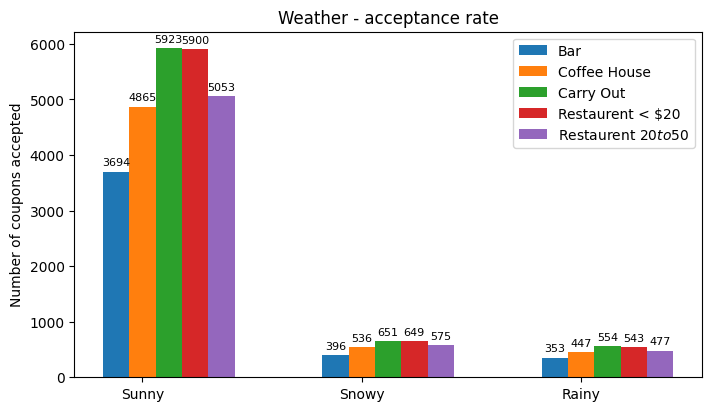

In [183]:
eateries = ["bar_sum", "cafe_sum", "togo_sum", "r20_sum", "r50_sum"]
eateries_label = [
    "Bar",
    "Coffee House",
    "Carry Out",
    "Restaurent < $20",
    "Restaurent $20 to $50",
]
colors = list(mcolors.TABLEAU_COLORS.keys())
width = 0.12

x = np.arange(len(overall.index))

fig, ax = plt.subplots(layout="constrained", figsize=(7, 4))

for counter, eatery in enumerate(eateries):
    offset = width * counter
    rects = ax.bar(
        x + offset,
        overall[eatery],
        width,
        label=eateries_label[counter],
        color=colors[counter],
    )
    ax.bar_label(rects, padding=3, fontsize=8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_title("Weather - acceptance rate")
ax.set_xticks(x + width, overall.index)
ax.legend(loc="upper right", ncols=1)
# ax.set_ylim(0, 10000)
plt.show()

In [129]:
overall

,_sum,_size,_percentage,bar_sum,bar_size,bar_percent,cafe_sum,cafe_size,cafe_percent,togo_sum,togo_size,togo_percent,r20_sum,r20_size,r20_percent,r50_sum,r50_size,r50_percent
weather,,,,,,,,,,,,,,,,,,
Sunny,5989,10069,59.48,3694,5931,62.28,4865,7700,63.18,5923,9956,59.49,5900,9916,59.50,5053,8290,60.95
Snowy,661,1405,47.05,396,843,46.98,536,1093,49.04,651,1383,47.07,649,1372,47.30,575,1218,47.21
Rainy,560,1210,46.28,353,713,49.51,447,929,48.12,554,1192,46.48,543,1176,46.17,477,1040,45.87


In [130]:
rate = df[df.Y == 1][["weather"]]
len(rate)

7210

In [131]:
(rate.groupby("weather").size() / len(rate) * 100).round(2).sort_values(ascending=False)

weather
Sunny    83.07
Snowy     9.17
Rainy     7.77
dtype: float64

In [132]:
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9435,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Male,36,Single,...,less1,gt8,gt8,never,1,0,0,0,1,1
6219,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),1d,Female,41,Married partner,...,less1,1~3,1~3,less1,1,1,0,0,1,0
9771,Work,Alone,Rainy,55,7AM,Bar,1d,Female,50plus,Married partner,...,less1,4~8,1~3,1~3,1,1,1,0,1,0
6488,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,41,Divorced,...,never,4~8,1~3,never,1,0,0,1,0,0
9220,Work,Alone,Sunny,30,7AM,Bar,1d,Male,26,Single,...,never,4~8,4~8,less1,1,1,0,1,0,0


In [133]:
df["destination"].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [134]:
df["passanger"].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [135]:
df["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [136]:
df["Y"].unique()

array([1, 0])

In [145]:
def custom_func(group):
    # group["percentage"] = (group[("Y", "sum")] / group[("Y", "size")] * 100).round(2)
    group["_percent"] = (group["_sum"] / group["_size"] * 100).round(2)
    return group

overall = df.groupby("time")

overall = overall[["time", "Y"]]

coupons = [
    "Bar",
    "CoffeeHouse",
    "CarryAway",
    "RestaurantLessThan20",
    "Restaurant20To50",
]
heading = ["bar", "cafe", "togo", "r20", "r50"]

overall = pd.concat(
    [
        (
            df[df[coupon] != "never"]
            .groupby("time")[["time", "Y"]]
            .agg(
                _sum=pd.NamedAgg(column="Y", aggfunc="sum"),
                _size=pd.NamedAgg(column="Y", aggfunc="size"),                
            )
            .pipe(custom_func)
            .rename(
                columns={
                    "_sum": heading[ctr] + "_sum",
                    "_size": heading[ctr] + "_size",
                    "_percent": heading[ctr] + "_percent"                    
                }
            )
            
        )
        for ctr, coupon in enumerate(coupons)
    ], axis=1
)
overall

,bar_sum,bar_size,bar_percent,cafe_sum,cafe_size,cafe_percent,togo_sum,togo_size,togo_percent,r20_sum,r20_size,r20_percent,r50_sum,r50_size,r50_percent
time,,,,,,,,,,,,,,,
10AM,847,1344,63.02,1157,1759,65.78,1367,2249,60.78,1359,2234,60.83,1188,1909,62.23
10PM,612,1177,52.00,786,1521,51.68,1007,1977,50.94,997,1963,50.79,857,1692,50.65
2PM,836,1196,69.90,1106,1552,71.26,1317,1990,66.18,1313,1980,66.31,1117,1674,66.73
6PM,1180,1899,62.14,1526,2471,61.76,1865,3187,58.52,1861,3178,58.56,1612,2668,60.42
7AM,968,1871,51.74,1273,2419,52.63,1572,3128,50.26,1562,3109,50.24,1331,2605,51.09


In [173]:
order = ['7AM',  '10AM', '2PM', '6PM',  '10PM']
overall = overall.loc[(x for x in order)]

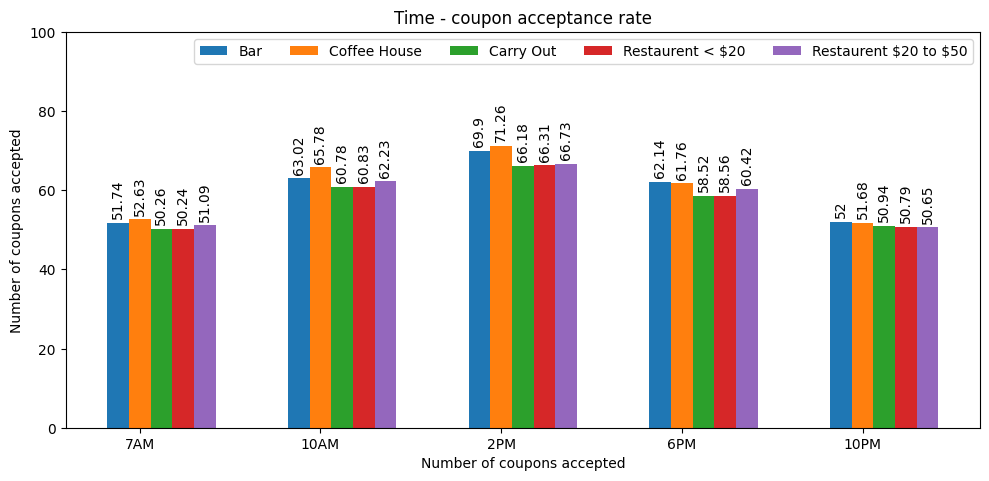

In [174]:
eateries = [x for x in overall.columns if "_percent" in x]
eateries_label = [
    "Bar",
    "Coffee House",
    "Carry Out",
    "Restaurent < $20",
    "Restaurent \\$20 to \\$50",
]
colors = list(mcolors.TABLEAU_COLORS.keys())
width = 0.12

x = np.arange(len(overall.index))

fig, ax = plt.subplots(figsize=(10, 5))
plt.subplots_adjust(top=0.2)

for counter, eatery in enumerate(eateries):
    offset = width * counter
    rects = ax.bar(
        x + offset,
        overall[eatery],
        width,
        label=eateries_label[counter],
        color=colors[counter],
    )
    ax.bar_label(rects, padding=3, fontsize=10, rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Number of coupons accepted")
ax.set_xlabel("Number of coupons accepted")
ax.set_title("Time - coupon acceptance rate")
ax.set_xticks(x + width, overall.index)
# ax.set_xticklabels(['7AM',  '10AM', '2PM', '6PM',  '10PM'])

ax.legend(loc="upper right", ncols=5) #, bbox_to_anchor=(0, 1.02, 1, 0.2))
ax.set_ylim(0, 100)
plt.tight_layout()
plt.show()